Mean R2 score for GradientBoosting regressor: 0.76


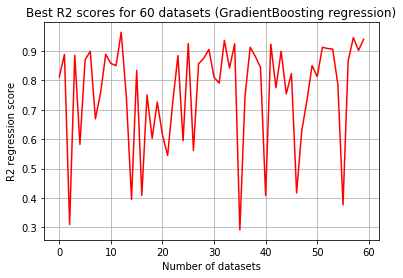

-------------x------------------x---------------
 


In [ ]:
import sys
import time
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
import warnings


warnings.filterwarnings('ignore')

%matplotlib inline
start_time = time.time()

clf_names_dir = os.listdir("results")

clf_names = list()
clf_mean_r2 = list()

for clf in clf_names_dir:
    data_path = "results/" + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    for f_name in files:
        f_path = data_path + "/" + f_name
        df = pd.read_csv(f_path, sep="\t")
        rank_test_score = df[df["rank_test_score"] == 1]
        mean_test_score = rank_test_score["mean_test_score"]
        r2_scores.append(mean_test_score.iloc[0])
    clf_names.append(clf)
    mean_r2 = np.mean(r2_scores)
    clf_mean_r2.append(mean_r2)
    
    print("Mean R2 score for %s regressor: %0.2f" % (clf, mean_r2))

    plt.figure()
    plt.plot(r2_scores, color='r')
    plt.grid(True)
    plt.xlabel("Number of datasets")
    plt.ylabel("R2 regression score")
    plt.title(('Best R2 scores for %d datasets (%s regression)' % (len(files), clf)))
    plt.show()
    print("-------------x------------------x---------------")
    print(" ")

plt.figure()
y_pos = np.arange(len(clf_names))
plt.barh(y_pos, clf_mean_r2)
plt.yticks(y_pos, tuple(clf_names))
plt.xlabel('R2 scores')
plt.title('R2 scores vs regressors')
plt.show()

end_time = time.time()
print('Total time taken: %d seconds' % int(end_time - start_time))